<a href="https://colab.research.google.com/github/fightmeat/Machine_Leaning/blob/main/20_%EC%B6%95%EA%B5%AC%EA%B2%BD%EA%B8%B0%EA%B2%B0%EA%B3%BC%EB%B6%84%EC%84%9D_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국제 축구 경기 분석
- 1872년부터 2018년부터 전 세계에서 개최된 국제 축구 대회 데이터를 분석한다.
- https://footystats.org/kr/download-stats-csv?season=-1
- 데이터셋에 6년간 대한민국 축구팀 경기 결과를 분석해봅시다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# word Cloud(or Tag Cloud, 태그 클라우드)
!pip install wordcloud

In [ ]:
import seaborn as sns
from wordcloud import WordCloud
# 한글 패키지 konlpy

- 라이브러리 or 모듈 : 파일명.py

In [ ]:
soccer = pd.read_csv('soccer.csv')

In [ ]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41540 non-null  object
 1   home_team   41540 non-null  object
 2   away_team   41540 non-null  object
 3   home_score  41540 non-null  int64 
 4   away_score  41540 non-null  int64 
 5   tournament  41540 non-null  object
 6   city        41540 non-null  object
 7   country     41540 non-null  object
 8   neutral     41540 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# data 컬럼에 데이터타입을 날짜와 시간형식으로 변경
# soccer.astype(['date':'datetime64[ns]'])
soccer.date = pd.to_datetime(soccer.date)
soccer.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [ ]:
# date 컬럼을 기준으로 내림차순 정렬
# 정렬결과를 soccer 데이터셋에 저장
soccer.sort_values(by='date',ascending=False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41539,2019-11-19,Lebanon,North Korea,0,0,FIFA World Cup qualification,Beirut,Lebanon,False
41517,2019-11-19,U.S. Virgin Islands,Saint Martin,1,2,CONCACAF Nations League,Upper Bethlehem,U.S. Virgin Islands,False
41515,2019-11-19,Saint Lucia,Montserrat,0,1,CONCACAF Nations League,Gros Islet,Saint Lucia,False
41514,2019-11-19,El Salvador,Dominican Republic,2,0,CONCACAF Nations League,San Salvador,El Salvador,False
41513,2019-11-19,Mexico,Bermuda,2,1,CONCACAF Nations League,Mexico City,Mexico,False
...,...,...,...,...,...,...,...,...,...
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


## 인사이트 도출
1. 홈경기와 원정경기의 결과를 분석

In [ ]:
# 홈경기와 원정경기를 분석
## 경기가 진행된 중립지역을 나타내는 컬럼의 값이 False에 해당되는 데이터를 대상으로 분석
## 홈에서 이루어진 경기의 결과를 승(팀명)과 패를 담는 파생변수를 생성,

In [ ]:
soccer.describe()

,home_score,away_score
count,41540.000000,41540.000000
mean,1.745643,1.187819
std,1.753444,1.405511
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
# 승리팀을 담는 컬럼 soccer['winner']

In [ ]:
# 홈경기와 원정경기의 득점합과 득점차 컬럼
soccer['score_sum'] = soccer.home_score + soccer.away_score
soccer['score_diff'] = soccer.home_score - soccer.away_score
soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,3


- score_diff의 값이 음수값이라면 원정팀이 승리한 경기임을 알 수 있다.

In [ ]:
soccer.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'score_sum', 'score_diff'],
      dtype='object')

In [ ]:
# 경기가 진행된 중립지역(neutral)을 나타내는 컬럼의 값이 False에 해당되는 데이터를 대상으로 분석
df = soccer[soccer['neutral'] == False]

In [ ]:
soccer['neutral'] == False

0        True
1        True
2        True
3        True
4        True
         ... 
41535    True
41536    True
41537    True
41538    True
41539    True
Name: neutral, Length: 41540, dtype: bool

In [ ]:
# 경기결과 : 2-1 식으로 표현
def final_score(df):
  max_s = max(df.home_score, df.away_score)
  min_s = min(df.home_score, df.away_score)
  return '{}-{}'.format(max_s, min_s)

In [ ]:
soccer['result'] = soccer.apply(final_score, axis=1)
soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0,0-0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,2,4-2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1,2-1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,0,2-2
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,3,3-0


In [ ]:
# 원정팀이 방문한 경기에서 홈팀이 획득한 총점수
soccer.groupby('away_team')['home_score'].count()

away_team
Abkhazia          10
Afghanistan       71
Albania          157
Alderney          12
Algeria          213
                ... 
Yugoslavia       290
Zambia           418
Zanzibar         147
Zimbabwe         266
Åland Islands     19
Name: home_score, Length: 306, dtype: int64

In [ ]:
# 국가명을 인덱스로
away_ind = pd.DataFrame(soccer.groupby('away_team')['home_score'].count().index)

In [ ]:
# 원정팀에 대해 홍팀이 획득한 점수
away_val = pd.DataFrame(soccer.groupby('away_team')['home_score'].count().values, columns=['Value'])

In [ ]:
home_total = pd.concat([away_ind, away_val], axis=1)
home_total.head()

,away_team,Value
0,Abkhazia,10
1,Afghanistan,71
2,Albania,157
3,Alderney,12
4,Algeria,213


In [ ]:
# 경기종류에 해당하는 컬럼의 값들을 하나의 문자열
text = " ".join(cups for cups in soccer.tournament)
wc = WorldCloud(max_words=30, background_color='white').generate(text)

plt.figure(figsize=(10,5))
# interpolation은 이미지 처리 : bilinear-부드럽게, None or none - 이미지 있는 그대로
plt.imshow(wc, inter)

In [ ]:
# 경기가 진행된 도시명을 시각화
text1 = " ".join(c for c in soccer.city)
wc1 = WordCloud(max_words=30, background_color='lightyellow').generate(text)

NameError: ignored

In [ ]:
soccer.tournament.value_counts()

Friendly                                17036
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
World Unity Cup                             4
Copa América qualification                  2
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Name: tournament, Length: 112, dtype: int64

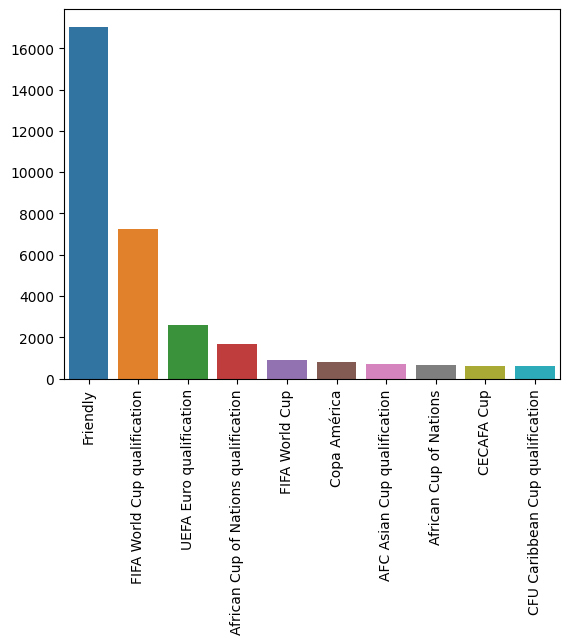

In [ ]:
sns.barplot(x=soccer['tournament'].value_counts().index[:10], y=soccer.tournament.value_counts().values[:10])
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.scatterplot(x='away_score',y='home_score',hue='neutral',date=soccer)
sns

## 대한민국의 경기결과 분석

In [ ]:
Korea = soccer[soccer.home_team == 'South Korea']
Korea

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,result
3082,1950-04-16,South Korea,Chinese Taipei,3,1,Friendly,Wan Chai,Hong Kong,True,4,2,3-1
3457,1953-04-08,South Korea,Chinese Taipei,2,4,Friendly,So Kon Po,Hong Kong,True,6,-2,4-2
3656,1954-06-20,South Korea,Turkey,0,7,FIFA World Cup,Geneva,Switzerland,True,7,-7,7-0
3935,1956-04-21,South Korea,Philippines,3,0,AFC Asian Cup qualification,Seoul,South Korea,False,3,3,3-0
3998,1956-08-26,South Korea,Chinese Taipei,2,0,AFC Asian Cup qualification,Seoul,South Korea,False,2,2,2-0
...,...,...,...,...,...,...,...,...,...,...,...,...
40577,2019-03-26,South Korea,Colombia,2,1,Friendly,Seoul,South Korea,False,3,1,2-1
40685,2019-06-07,South Korea,Australia,1,0,Friendly,Busan,South Korea,False,1,1,1-0
40753,2019-06-11,South Korea,Iran,1,1,Friendly,Seoul,South Korea,False,2,0,1-1
40989,2019-09-05,South Korea,Georgia,2,2,Friendly,Istanbul,Turkey,True,4,0,2-2


In [ ]:
all_away_team = korea['away_team'].unique()
all_away_team

NameError: ignored

### 홍팀 '한국'을 상대한 원정팀의 승점과 한국팀의 승점을 이용한 시각화

In [ ]:
Korea.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'score_sum', 'score_diff',
       'result'],
      dtype='object')

In [ ]:
away_team = []
korea_teamn = []

for team in all_away_team:
  away_team.append(np.sum(Korea[Korea['away_team'] == team].away_score))
  korea_team.append(np.sum(Korea[Korea['away_team'] == team].home_score))

In [ ]:
away_team

[]

In [ ]:
sns.pointplot(all)

In [ ]:
plt.subplot(figsize=(20,10))
sns.pointplot(x=all_away_team, y=korea_team, color='green', label='korea_team')
sns.pointplot(x=all_away_team, y=away_team, color='red', label='away_team')
# annotate()
ax.annotate('korea team', xy=(13, 40), xttext=(18, 43), fontsize=20, arrowprops=dict(facecolor='blue', shrink=0.05))
ax.annotate('away team', xy=(), xytext=(), fontsize=20,
            arrowprops=dict(facecolor='red', shink=0.05))
plt.ylabel('scores',fontsize=20, color='blue')
plt.xlabel('country',fontsize=20, color='blue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.barplot(x=all_away_team[:20], y=korea_team[:20])
plt.xticks(rotation=90)
plot.show()

NameError: ignored

## FIFA World Cup 분석

In [ ]:
fifa = soccer[soccer['tournament'] == 'FIFA World Cup']
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,result
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,3,-3,3-0
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,5,3,4-1
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,3,-1,2-1
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,4,-2,3-1
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1,1,1-0


In [ ]:
len(fifa.home_team.unique())

78

In [ ]:
!pip install stylecloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259492 sha256=e10e8cb674073d97f5e15f041c37e50759208e755f6e153bd59ebd6937efc9b6
  Stored in directory: /root/.cache/pip/wheels/aa/c8/27/9374f4fc7133015d902b5e2c75ad951edd57eb1ae948495915
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=782d6cff8e200cbce5873058a6308d9a0e0f5d79fa25c212ddef721500bc0f24
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7

In [ ]:
import stylecloud

In [ ]:
text = " ".join()
stylecloud.gen_stylecloud(file_path='constitution.txt',
                          icon_name='fas fa-dog',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient=)